# Fully-Connected Deep Learning 

Here we only focus on feed-forward networks. The feed-forward neural networks resemble non-linear regression. Neural networks is composed of hidden layers (projection), and each hidden layer contain several neurons (projection dimension). 

As the number of neurons in each layer increase, the network becomes _wider_. As the number of hidden layers increase, the network becomes _deeper_. 




## Simulated data 
As a simple starting example, remember the  bivariate classification on simulated data of **Chapter 3**. Here the matrix $X$ is the predictor and $Y$ is a binary classification indicator. In **Chapter 3** we used SVM to classify the data. This time we try a neural networks. In fitting neural networks there are several steps to follow

- Define the task (supervised (classification, regression), unsupervised (generative, anomaly detection,...), reinforcement learning) 
- Set up data set X as predictive and Y as response
- Divide the data into training set and test set
- Define the predictive model 
- Train the model on training data
    - set the optimizer 
    - set the batch size 
    - set the number of epochs 
    - define the loss
    - define the metric
    - define the regularization
- Validate the model over the validation set and iterate over the previous step until a good performance
- Choose the best models and evaluate on the test set



In [29]:
# load required libraries
import numpy as np

import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Start simulation, X is multivariate Gaussian, Y is a binary variable 0 or 1.

In [30]:
np.random.seed(0)
n = 100
X = np.vstack((np.random.multivariate_normal([0,0],[[1,0],[0,1]] ,n), np.random.multivariate_normal([3,3],[[1,0],[0,1]] ,n)))
Y = np.array([0] * n + [1] * n)

The first step in data preparation requires Y to be one hot coded, i.e. $(0,1)$ for one class, and $(1,0)$ for another class.

In [31]:
# convert integer Y to dummy variable Y (i.e. one hot encoded)
Y = keras.utils.np_utils.to_categorical(Y)


Now divide data into training and validation sets. This data partition can provide a warning in the case of overfitting.

In [32]:
#divide data into train and validation 80% 20%
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=150)



Defining a model is simple. You must make sure what is the input dimension and what is the output dimension, then feed the data in. 

Here we start with a very simple model, a single  projection over a single dimension. This makes the neural model equivalent to the logistic regression.

In [33]:
#  define empty model
model1 = Sequential()

# specify the form of input and the form of output
model1.add(Dense(units = 2, input_dim = 2, activation = 'softmax'))
# input_dim is only required for the first layer
# units must match the form of the input for the next layer, here next layer is the output and is binary 
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


Now we must feed the data into the constructed model. The data goes to the model by batch and model is fit using stochastic gradient descent. The batch size and epoch number are important parameters.

In [34]:
# train on the training data
fit1 = model1.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs = 20, batch_size = 64)

Train on 160 samples, validate on 40 samples
Epoch 1/20
160/160 [==============================] - 0s - loss: 1.2351 - acc: 0.1938 - val_loss: 0.9699 - val_acc: 0.4250
Epoch 2/20
160/160 [==============================] - 0s - loss: 1.2196 - acc: 0.1938 - val_loss: 0.9617 - val_acc: 0.4500
Epoch 3/20
160/160 [==============================] - 0s - loss: 1.2035 - acc: 0.1875 - val_loss: 0.9536 - val_acc: 0.4500
Epoch 4/20
160/160 [==============================] - 0s - loss: 1.1871 - acc: 0.1812 - val_loss: 0.9456 - val_acc: 0.4500
Epoch 5/20
160/160 [==============================] - 0s - loss: 1.1717 - acc: 0.1812 - val_loss: 0.9377 - val_acc: 0.4500
Epoch 6/20
160/160 [==============================] - 0s - loss: 1.1568 - acc: 0.1812 - val_loss: 0.9299 - val_acc: 0.4500
Epoch 7/20
160/160 [==============================] - 0s - loss: 1.1406 - acc: 0.1687 - val_loss: 0.9223 - val_acc: 0.4000
Epoch 8/20
160/160 [==============================] - 0s - loss: 1.1255 - acc: 0.1625 - val_lo

Here we just define a simple function to visualize the trend of accuracy gain in each epoch. When the dataset by batch is fed until all data are fed, epoch becomes 1. Then again a random sample by batch are fed until all data are fed and epoch becomes 2. Depending on a random start, the result of training might be different. It is a good idea to try fitting the model several times to see if the accuracy changes drammatically.

In [35]:
def accplot (fit, model, xtrain, ytrain, xvalid, yvalid):
    print("Final Validation Accuracy: %.2f%%" % (model.evaluate(xvalid, yvalid, verbose=0)[1] * 100))
    print("Final Training Accuracy: %.2f%%" % (model.evaluate(xtrain, ytrain, verbose=0)[1] * 100))
    val_acc, = plt.plot(fit.history["val_acc"], label='Validation Accuracy')
    train_acc, = plt.plot(fit.history["acc"], label='Training Accuracy')
    plt.title("Model Accuracy vs Epochs")
    plt.ylim(ymin = 0, ymax = 1)
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.show()


Final Validation Accuracy: 42.50%
Final Training Accuracy: 18.75%


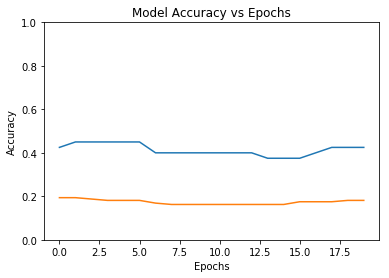

In [36]:
accplot(fit1, model1, X_train, Y_train, X_valid, Y_valid)

Now that you trained a simple model, let's make the network deeper and wider. 

In [37]:
# Now a deeper and a wider model 
model2 = Sequential()
model2.add(Dense(units = 100, input_dim = 2, activation = 'sigmoid'))
model2.add(Dense(units = 100, activation='sigmoid'))
model2.add(Dense(units = 100, activation='sigmoid'))
model2.add(Dense(units = 100, activation='sigmoid'))
model2.add(Dense(units = 2, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
fit2 = model2.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=20, batch_size=64)


Train on 160 samples, validate on 40 samples
Epoch 1/20
160/160 [==============================] - 0s - loss: 0.7104 - acc: 0.4562 - val_loss: 0.6812 - val_acc: 0.6750
Epoch 2/20
160/160 [==============================] - 0s - loss: 0.6896 - acc: 0.5438 - val_loss: 0.7796 - val_acc: 0.3250
Epoch 3/20
160/160 [==============================] - 0s - loss: 0.6960 - acc: 0.5438 - val_loss: 0.7975 - val_acc: 0.3250
Epoch 4/20
160/160 [==============================] - 0s - loss: 0.6919 - acc: 0.5438 - val_loss: 0.7312 - val_acc: 0.3250
Epoch 5/20
160/160 [==============================] - 0s - loss: 0.6845 - acc: 0.5438 - val_loss: 0.6838 - val_acc: 0.8500
Epoch 6/20
160/160 [==============================] - 0s - loss: 0.6862 - acc: 0.6688 - val_loss: 0.6869 - val_acc: 0.7250
Epoch 7/20
160/160 [==============================] - 0s - loss: 0.6826 - acc: 0.6875 - val_loss: 0.7212 - val_acc: 0.3250
Epoch 8/20
160/160 [==============================] - 0s - loss: 0.6771 - acc: 0.5438 - val_lo

Final Validation Accuracy: 85.00%
Final Training Accuracy: 93.12%


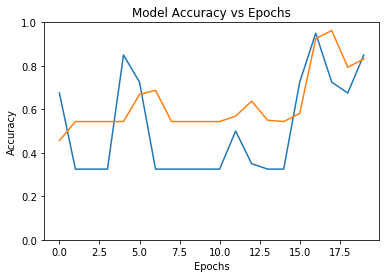

In [39]:
accplot(fit2, model2, X_train, Y_train, X_valid, Y_valid)

## Zip data 
The zip data of **Chapter 4 ** is a more realistic data set. We try it first with a simple network, equivalent to multilogit model, and then using a wider and deeper network.

In [40]:
zipdata = np.loadtxt("../data/zip.train")
X=zipdata[:,1:]
Y=zipdata[:,0]
# one hot encoding of Y
Y = keras.utils.np_utils.to_categorical(Y)

In [41]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=150)


In [42]:
# multi-logit regression
model3 = Sequential()
model3.add(Dense(units = 10, input_dim = 256, activation = 'softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                2570      
Total params: 2,570
Trainable params: 2,570
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
fit3 = model3.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=20, batch_size=64)


Train on 5832 samples, validate on 1459 samples
Epoch 1/20
5832/5832 [==============================] - 0s - loss: 1.3870 - acc: 0.5676 - val_loss: 0.7301 - val_acc: 0.8067
Epoch 2/20
5832/5832 [==============================] - 0s - loss: 0.5428 - acc: 0.8637 - val_loss: 0.4655 - val_acc: 0.8876
Epoch 3/20
5832/5832 [==============================] - 0s - loss: 0.3847 - acc: 0.9023 - val_loss: 0.3723 - val_acc: 0.9130
Epoch 4/20
5832/5832 [==============================] - 0s - loss: 0.3192 - acc: 0.9201 - val_loss: 0.3238 - val_acc: 0.9184
Epoch 5/20
5832/5832 [==============================] - 0s - loss: 0.2796 - acc: 0.9312 - val_loss: 0.2911 - val_acc: 0.9219
Epoch 6/20
5832/5832 [==============================] - 0s - loss: 0.2531 - acc: 0.9362 - val_loss: 0.2705 - val_acc: 0.9287
Epoch 7/20
5832/5832 [==============================] - 0s - loss: 0.2348 - acc: 0.9400 - val_loss: 0.2568 - val_acc: 0.9315
Epoch 8/20
5832/5832 [==============================] - 0s - loss: 0.2200 - a

Final Validation Accuracy: 94.45%
Final Training Accuracy: 96.38%


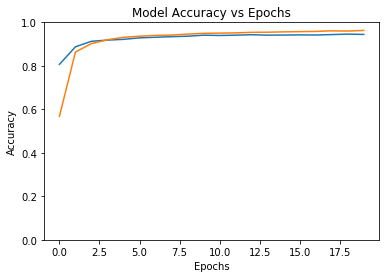

In [44]:
accplot(fit3, model3, X_train, Y_train, X_valid, Y_valid)



## Fully-connected Deep and Wide Network

In [45]:
# multi-logit regression
model4 = Sequential()
model4.add(Dense(units = 500, input_dim = 256, activation = 'sigmoid')) #layer 01
model4.add(Dense(units = 500, input_dim = 256, activation = 'sigmoid')) #layer 02
model4.add(Dense(units = 500, input_dim = 256, activation = 'sigmoid')) #layer 03
model4.add(Dense(units = 500, input_dim = 256, activation = 'sigmoid')) #layer 04
model4.add(Dense(units = 500, input_dim = 256, activation = 'sigmoid')) #layer 05
model4.add(Dense(units = 10, activation = 'softmax'))  # layer output
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 500)               128500    
_________________________________________________________________
dense_24 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_25 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5010      
Total params: 1,135,510
Trainable params: 1,135,510
Non-trainable params: 0
_________________________________________________________________


In [46]:
fit4 = model4.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=20, batch_size=64)


Train on 5832 samples, validate on 1459 samples
Epoch 1/20
5832/5832 [==============================] - 2s - loss: 1.8141 - acc: 0.3289 - val_loss: 1.1500 - val_acc: 0.5319
Epoch 2/20
5832/5832 [==============================] - 1s - loss: 0.8092 - acc: 0.6896 - val_loss: 0.5263 - val_acc: 0.8478
Epoch 3/20
5832/5832 [==============================] - 1s - loss: 0.4232 - acc: 0.8760 - val_loss: 0.3607 - val_acc: 0.8951
Epoch 4/20
5832/5832 [==============================] - 1s - loss: 0.3000 - acc: 0.9120 - val_loss: 0.3017 - val_acc: 0.9123
Epoch 5/20
5832/5832 [==============================] - 1s - loss: 0.2250 - acc: 0.9347 - val_loss: 0.2319 - val_acc: 0.9349
Epoch 6/20
5832/5832 [==============================] - 1s - loss: 0.1845 - acc: 0.9475 - val_loss: 0.2787 - val_acc: 0.9171
Epoch 7/20
5832/5832 [==============================] - 1s - loss: 0.1693 - acc: 0.9520 - val_loss: 0.2353 - val_acc: 0.9376
Epoch 8/20
5832/5832 [==============================] - 1s - loss: 0.1430 - a

Final Validation Accuracy: 96.02%
Final Training Accuracy: 99.59%


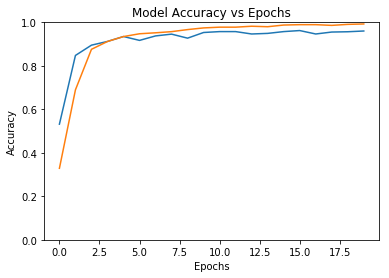

In [47]:
accplot(fit4, model4, X_train, Y_train, X_valid, Y_valid)



# Convolutional Deep Learning

In previous models the spatial structure of image was ignored. Convolutional network is a building-block of image (and text) modeling. First 256 pixle data must be re-formatted as 16X16 image as in **Chapter 4**. Then the re-structured data are fed into the model in batches as before.

In [48]:
# re-structure the data into images 16X16 images
X_train2D = np.zeros(shape = [X_train.shape[0],16,16,1])
X_valid2D = np.zeros(shape = [X_valid.shape[0],16,16,1])

for i in range(X_train.shape[0]):
    X_train2D[i,] = X_train[i,].reshape(16,16,1)

for i in range(X_valid.shape[0]):
    X_valid2D[i,] = X_valid[i,].reshape(16,16,1)

#    X2D_train = 
#X=zipdata2D[:,1:]
#Y=zipdata2D[:,0]
# one hot encoding of Y
#Y = keras.utils.np_utils.to_categorical(Y)

In [49]:
[X_train.shape[0],16,16,1]

[5832, 16, 16, 1]

Now we try to build two layers of convolutions. Often a convolutional layer is attached to a max-pooling layer. At the top layer, often a fully-connected layer is attached to the max-pooling layer (right before the output layer), to combine the convolution information. 

In [50]:

model5 = Sequential()
model5.add(Conv2D(filters = 8, kernel_size = [6,6], padding = 'same', input_shape=(16, 16, 1), activation='sigmoid'))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters = 16, kernel_size = [4,4], padding = 'same', input_shape=(16, 16, 1), activation='sigmoid'))
model5.add(MaxPooling2D(pool_size=4))
model5.add(Flatten())
model5.add(Dense(units = 256, activation = 'sigmoid'))  # layer output
model5.add(Dense(units = 10, activation = 'softmax'))  # layer output
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [51]:
print(model5.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 8)         296       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2064      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total para

In [52]:
fit5 = model5.fit(X_train2D, Y_train, validation_data=(X_valid2D, Y_valid), epochs=20, batch_size=64)


Train on 5832 samples, validate on 1459 samples
Epoch 1/20
5832/5832 [==============================] - 1s - loss: 2.2872 - acc: 0.1612 - val_loss: 2.2574 - val_acc: 0.1604
Epoch 2/20
5832/5832 [==============================] - 1s - loss: 2.1777 - acc: 0.2294 - val_loss: 1.9807 - val_acc: 0.3002
Epoch 3/20
5832/5832 [==============================] - 1s - loss: 1.6778 - acc: 0.4590 - val_loss: 1.3731 - val_acc: 0.6018
Epoch 4/20
5832/5832 [==============================] - 1s - loss: 1.1583 - acc: 0.6804 - val_loss: 0.9622 - val_acc: 0.7306
Epoch 5/20
5832/5832 [==============================] - 1s - loss: 0.8497 - acc: 0.7876 - val_loss: 0.7357 - val_acc: 0.7834
Epoch 6/20
5832/5832 [==============================] - 1s - loss: 0.6470 - acc: 0.8462 - val_loss: 0.5687 - val_acc: 0.8595
Epoch 7/20
5832/5832 [==============================] - 1s - loss: 0.5032 - acc: 0.8841 - val_loss: 0.4514 - val_acc: 0.8931
Epoch 8/20
5832/5832 [==============================] - 1s - loss: 0.3967 - a

Final Validation Accuracy: 96.30%
Final Training Accuracy: 97.31%


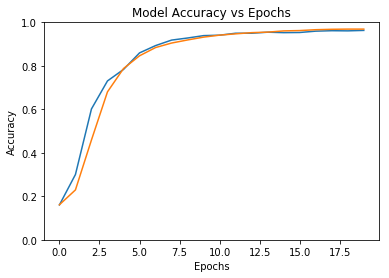

In [53]:
accplot(fit5, model5, X_train2D, Y_train, X_valid2D, Y_valid)

# The role of the test set
After fitting various models, the final model is chosen using an independent set of data, called the test set. 
First we must prepare the data for testing it on the models. We need to prepare one for fully-connected models that only receives vector X (1X256) as predictors, and another data the receives a matrix 16X16 as predictors.
The categorical reponse variable Y, like the training section must be one-hot coded. 

In [54]:
zipdata = np.loadtxt("../data/zip.test")
# divide data into preditor X_test, and response Y_test
X_test = zipdata[:,1:]
Y_test = zipdata[:,0]

# one hot encoding of Y_test
Y_test = keras.utils.np_utils.to_categorical(Y_test)

# reshape X_test for convolutional model
X_test2D = np.zeros(shape = [X_test.shape[0],16,16,1])
for i in range(X_test.shape[0]):
    X_test2D[i,] = X_test[i,].reshape(16,16,1)


In [55]:
#  check the accuracy of multilogit  (no hidden layer) model
score3 = model3.evaluate(X_test, Y_test, verbose = 0)

# check the accuracy of wide and deep fully-connected model
score4 = model4.evaluate(X_test, Y_test, verbose = 0)

# check the accuracy of convolution model
score5 = model5.evaluate(X_test2D, Y_test, verbose = 0)


In [56]:
print score3[1], score4[1], score5[1]

0.90981564536 0.925759840677 0.933731938454
